In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from keras.models import Sequential
from keras.layers import Conv2D,Dropout,MaxPooling2D,Flatten,Dense,BatchNormalization
import keras
import os

In [2]:
size=(32,32,1)

In [3]:
X_train = os.listdir("./archive/Train Images 13440x32x32/train")
X_test=os.listdir("./archive/Test Images 3360x32x32/test")

In [4]:
arabic_characters = ['alef', 'beh', 'teh', 'theh', 'jeem', 'hah', 'khah', 'dal', 'thal',
                    'reh', 'zain', 'seen', 'sheen', 'sad', 'dad', 'tah', 'zah', 'ain',
                    'ghain', 'feh', 'qaf', 'kaf', 'lam', 'meem', 'noon', 'heh', 'waw', 'yeh']

In [5]:
ss="id_7400_label_1.png"
arabic_characters[int(ss.split('label_')[1].split('.')[0])]

'beh'

In [6]:
y_train = []
for filename in X_train:
    y_train.append(filename.split('label_')[1].split('.')[0])
y_test=[]
for filename in X_test:
    y_test.append(filename.split('label_')[1].split('.')[0])
    

print("Size of train",len(y_train))
print("Size of test",len(y_test))

Size of train 13440
Size of test 3360


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train , test_size = 0.10, random_state = 101)

In [8]:
train = pd.DataFrame({
    'filename': X_train,
    'category': y_train
})
validation = pd.DataFrame({
    'filename': X_val,
    'category': y_val
})
test = pd.DataFrame({
    'filename': X_test,
    'category': y_test
})

In [9]:
train.head()

,filename,category
0,id_12753_label_27.png,27
1,id_4705_label_1.png,1
2,id_3807_label_28.png,28
3,id_2996_label_11.png,11
4,id_7682_label_9.png,9


In [10]:
def lebel_fix(category):
    if(category):
       x=arabic_characters[int(category)-1]
    return x

In [11]:
train['category']=train['category'].apply(lebel_fix)
validation['category']=validation['category'].apply(lebel_fix)
test['category']=test['category'].apply(lebel_fix)

In [12]:
train.head()

,filename,category
0,id_12753_label_27.png,waw
1,id_4705_label_1.png,alef
2,id_3807_label_28.png,yeh
3,id_2996_label_11.png,zain
4,id_7682_label_9.png,thal


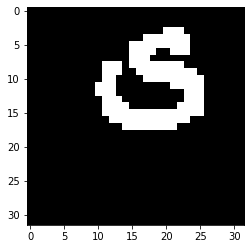

In [13]:
image = load_img('./archive/Train Images 13440x32x32/train/'+X_train[2])
plt.imshow(image)

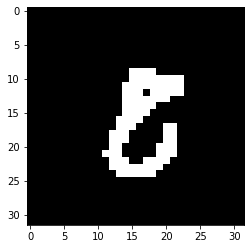

In [14]:
image = load_img('./archive/Test Images 3360x32x32/test/'+X_test[6])
plt.imshow(image)

In [15]:
model = Sequential()

model.add(Conv2D(32,3, activation='relu', input_shape=size))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dense(28, activation='softmax')) # 28 because we have 28 classes
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 15, 15, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4128      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 4, 4, 32)          128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 64)          1

In [16]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [17]:
batch=64
epoch=100

In [18]:
training_set = train_datagen.flow_from_dataframe(
    train, 
    "./archive/Train Images 13440x32x32/train", 
    x_col='filename',
    y_col='category',
    color_mode="grayscale",
    target_size=(32,32),
    class_mode='categorical',
    batch_size=batch
)

Found 12096 validated image filenames belonging to 28 classes.


In [19]:
val_set = train_datagen.flow_from_dataframe(
    validation, 
    "./archive/Train Images 13440x32x32/train", 
    x_col='filename',
    y_col='category',
    target_size=(32,32),
    color_mode="grayscale",
    class_mode='categorical',
    batch_size=batch
)

Found 1344 validated image filenames belonging to 28 classes.


In [20]:
model.fit(training_set,
          steps_per_epoch = len(training_set),
          epochs = epoch,
          validation_data = val_set,
          validation_steps=len(val_set))

Epoch 1/100
189/189 [==============================] - 123s 650ms/step - loss: 1.9866 - accuracy: 0.4087 - val_loss: 2.0373 - val_accuracy: 0.3326
Epoch 2/100
189/189 [==============================] - 32s 171ms/step - loss: 1.2909 - accuracy: 0.5789 - val_loss: 1.2987 - val_accuracy: 0.5774
Epoch 3/100
189/189 [==============================] - 33s 177ms/step - loss: 1.0694 - accuracy: 0.6447 - val_loss: 1.0057 - val_accuracy: 0.6749
Epoch 4/100
189/189 [==============================] - 33s 177ms/step - loss: 0.9122 - accuracy: 0.6968 - val_loss: 0.9471 - val_accuracy: 0.6964
Epoch 5/100
189/189 [==============================] - 33s 176ms/step - loss: 0.8552 - accuracy: 0.7091 - val_loss: 0.8514 - val_accuracy: 0.7359
Epoch 6/100
189/189 [==============================] - 33s 173ms/step - loss: 0.8374 - accuracy: 0.7173 - val_loss: 0.8124 - val_accuracy: 0.7426
Epoch 7/100
189/189 [==============================] - 36s 193ms/step - loss: 0.7692 - accuracy: 0.7391 - val_loss: 0.8184 

Epoch 57/100
189/189 [==============================] - 34s 182ms/step - loss: 0.3916 - accuracy: 0.8714 - val_loss: 0.4957 - val_accuracy: 0.8385
Epoch 58/100
189/189 [==============================] - 31s 166ms/step - loss: 0.3690 - accuracy: 0.8708 - val_loss: 0.5023 - val_accuracy: 0.8423
Epoch 59/100
189/189 [==============================] - 33s 173ms/step - loss: 0.3386 - accuracy: 0.8788 - val_loss: 0.5116 - val_accuracy: 0.8385
Epoch 60/100
189/189 [==============================] - 35s 185ms/step - loss: 0.3388 - accuracy: 0.8774 - val_loss: 0.6195 - val_accuracy: 0.8125
Epoch 61/100
189/189 [==============================] - 34s 182ms/step - loss: 0.3209 - accuracy: 0.8862 - val_loss: 0.5733 - val_accuracy: 0.8326
Epoch 62/100
189/189 [==============================] - 33s 173ms/step - loss: 0.3195 - accuracy: 0.8857 - val_loss: 0.5439 - val_accuracy: 0.8438
Epoch 63/100
189/189 [==============================] - 33s 173ms/step - loss: 0.3270 - accuracy: 0.8897 - val_loss: 0

In [21]:
test_set = test_datagen.flow_from_dataframe(
    test, 
    "./archive/Test Images 3360x32x32/test", 
    x_col='filename',
    y_col='category',
    target_size=(32,32),
    color_mode="grayscale",
    class_mode='categorical',
    batch_size=10
)
score=model.evaluate(test_set)
print('\n', 'Test accuracy:', score[1]*100)

Found 3360 validated image filenames belonging to 28 classes.
336/336 [==============================] - 26s 76ms/step - loss: 0.5387 - accuracy: 0.8571

 Test accuracy: 85.71428656578064


In [22]:
model.save('arabic')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: arabic/assets


In [23]:
#model = keras.models.load_model('arabic')

In [24]:
label_map = dict((v,k) for k,v in training_set.class_indices.items())

In [25]:
sample = np.random.choice(X_test)
image = load_img('./archive/Test Images 3360x32x32/test/'+sample,color_mode='grayscale')
img=img_to_array(image).reshape(-1,32,32,1)
predict=model.predict(img)
predict=np.argmax(predict,axis = 1)

In [26]:
print("The character is : ",label_map[predict[0]])

The character is :  theh


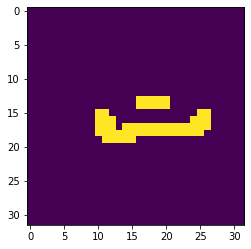

In [27]:
plt.imshow(image)

In [28]:
test_set = test_datagen.flow_from_dataframe(
    test, 
    "./archive/Test Images 3360x32x32/test", 
    x_col='filename',
    target_size=(32,32),
    color_mode="grayscale",
    class_mode=None,
    shuffle=False
)

Found 3360 validated image filenames.


In [29]:
predict=model.predict(test_set)
predict=np.argmax(predict,axis = 1)

In [30]:
y_p=[]
for i in range(len(y_test)):
    y_p.append(label_map[predict[i]])

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_p,test['category'])

In [32]:
accuracy = sum(cm[i][i] for i in range(28)) / len(y_test)
print("accuracy = " + str(accuracy))

accuracy = 0.8571428571428571
